In [1]:
import pandas as pd
import numpy as np

from warnings import filterwarnings

filterwarnings('ignore')

In [2]:
data = pd.read_csv("../Data/Hitters.csv")
df = data.copy()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [3]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [4]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [5]:
y = df["Salary"]

In [6]:
X_ = df.drop(["Salary","League","Division","NewLeague"],axis = 1).astype("float64")

In [7]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [8]:
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA()

In [11]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [12]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals =4)*100)[0:5]
#The first component explained 38% of the total variance, namely the variance in the data set, the variance explained by the second component together with the first component is around 60%

array([38.18, 59.88, 70.88, 78.88, 84.18])

In [13]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train,y_train)
pcr_model.intercept_

543.4834416243655

In [14]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

In [15]:
y_pred = pcr_model.predict(X_reduced_train)

In [16]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_train, y_pred))

289.3292825564976

In [17]:
from sklearn.metrics import r2_score

r2_score(y_train,y_pred)

0.5770075250410179

In [20]:
pca2 = PCA()

In [21]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [22]:
y_pred = pcr_model.predict(X_reduced_test)

In [24]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,y_pred))

405.1575364149963

In [26]:
from sklearn import model_selection

cv10 = model_selection.KFold(n_splits=10,shuffle=True,random_state=37)

In [27]:
lm = LinearRegression()

In [28]:
RMSE = []

In [29]:
for i in np.arange(1,X_reduced_train.shape[1]+1):
    score = np.sqrt(-1*model_selection.cross_val_score(lm,X_reduced_train[:,:i],y_train.ravel(),cv=cv10,scoring="neg_mean_squared_error").mean())

    RMSE.append(score)

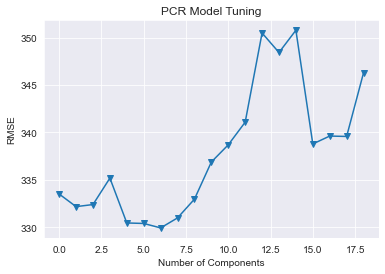

In [33]:
import matplotlib.pyplot as plt
plt.plot(RMSE, '-v')
plt.xlabel('Number of Components')
plt.ylabel('RMSE')
plt.title('PCR Model Tuning');
#optimum bileşen değer setini bulduk, train setini kullandık.

In [31]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:6],y_train)
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [34]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_train,y_pred))

308.8265983094501